In [ ]:
#EDA--> exploratory dat analysis
#parts of data
#univariate analysis  analysis on a single independent data
#bivariate analysis    analysis on a two columns
#multivariate analysis  analysis on more than 2 columns

#data types
#numerical data or continuous data   age (year,month,day ),height
#catogiaral data or discrete data    total number

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv("/content/titanic - titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df['Survived'].value_counts()

,count
Survived,
0,266
1,152


<Axes: xlabel='Survived', ylabel='count'>

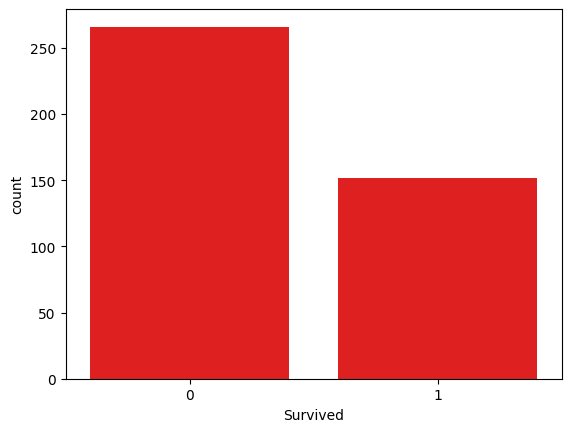

In [ ]:
sns.countplot(x=df['Survived'],color='red')

<Axes: xlabel='Survived'>

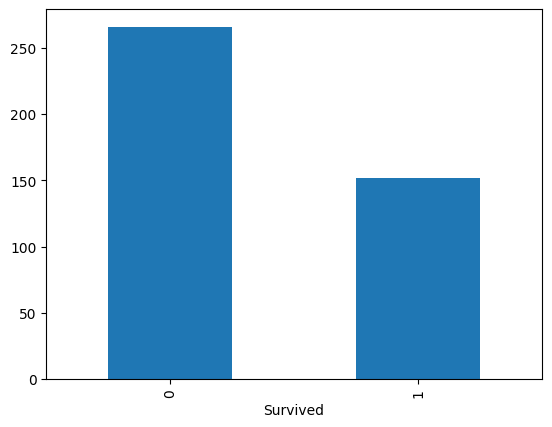

In [ ]:
df['Survived'].value_counts().plot(kind='bar')  #this used for two columns

<Axes: ylabel='count'>

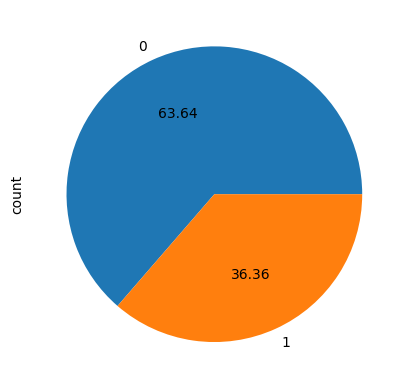

In [ ]:
df['Survived'].value_counts().plot(kind='pie',autopct='%.2f')

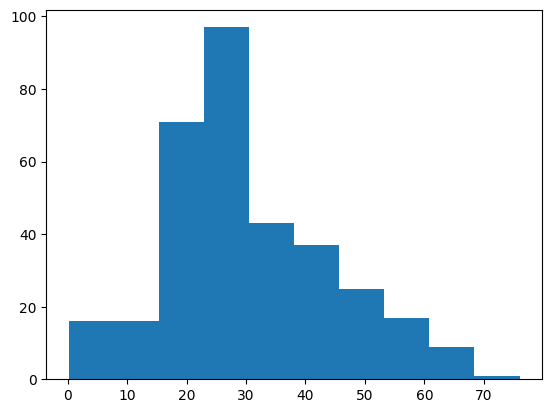

In [ ]:
plt.hist(x=df['Age'])  #it work on catogorical data
plt.show()

In [ ]:
#displot
#histplot
#boxplot


#boxplot  for find our outliers
#lower fances
#25% data
#IQR(inter quartile range)(75%-25%)
#75% data
#upper fences


#x=1,2,3,4,5
#mean=(1+2+3+4+5)/5=15/5=3   here 100 is outlier
#x=1,2,3,4,5,100
#mean=15+100/6=115/6=19.3

<Axes: xlabel='Age'>

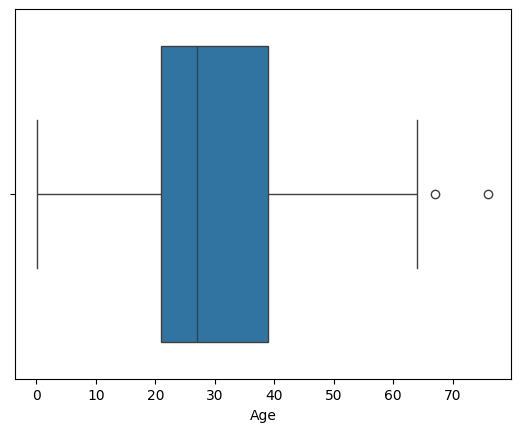

In [ ]:
sns.boxplot(x=df['Age'])

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv("/content/linkedin-reviews - linkedin-reviews.csv")
df

,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1
2,Slow and it tries to upload your contacts with...,1
3,Add ability to customize the profile and move ...,4
4,"Good app, but it's a pain that it's not possib...",4
...,...,...
697,"Can't trust, Going to uninstall just for that ...",1
698,It really gets me linked in with my friends. H...,5
699,It lacks most of what makes the other social n...,4
700,Really disappointed in the new version. Seems ...,2


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  702 non-null    object
 1   Rating  702 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.1+ KB


In [ ]:
#EDA
#we will start by the distribution of ratings.it will provide insight into the overall
#sentiment of the reviews .then we can explore further, such as analysing the length of
#reviews, and

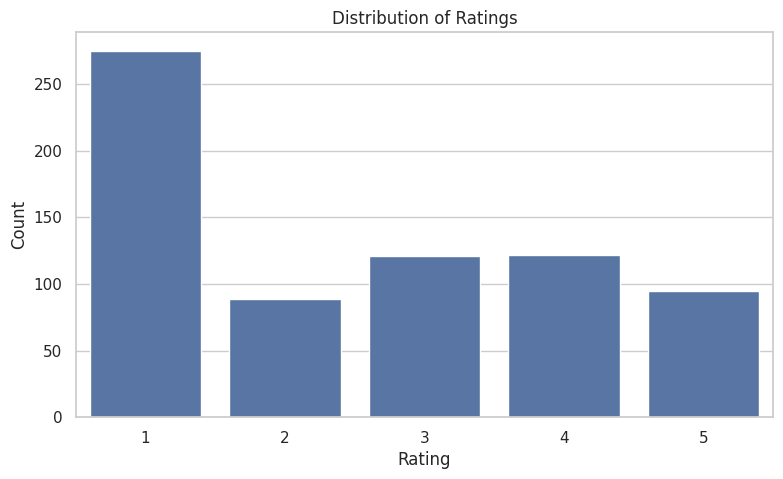

In [ ]:
sns.set(style='whitegrid')
plt.figure(figsize=(9,5))
sns.countplot(data=df,x='Rating')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [ ]:
#!pip install text

In [ ]:
from textblob import TextBlob

In [ ]:
def textblob_sentiment_analysis(review):
  sentiment=TextBlob(review).sentiment
  if sentiment.polarity>0.1:
    return 'Positive'
  elif sentiment.polarity<-0.1:
    return'Negative'
  else:
    return'Neutral'

In [ ]:
df['sentiment']=df['Review'].apply(textblob_sentiment_analysis)

In [ ]:
df.sample(5)

,Review,Rating,sentiment
465,No longer works on epic 4g!,1,Positive
281,Need ability to edit profile from app 5* if up...,3,Neutral
691,Need to UI attractive,3,Positive
446,Slow - had to un-install.,1,Negative
491,Either sync is painfully slow or app is broken...,1,Neutral


In [ ]:
sentiment_distribution=df['sentiment'].value_counts()
sentiment_distribution

,count
sentiment,
Neutral,300
Positive,295
Negative,107


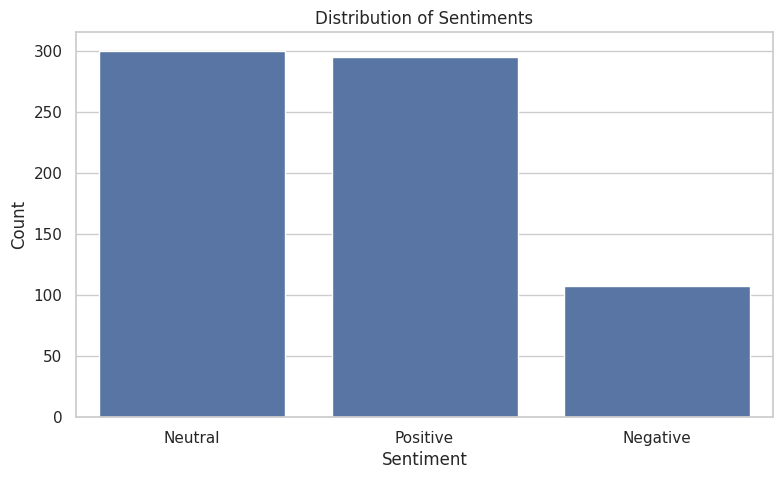

In [ ]:
plt.figure(figsize=(9,5))
sns.barplot(x=sentiment_distribution.index,
            y=sentiment_distribution.values)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

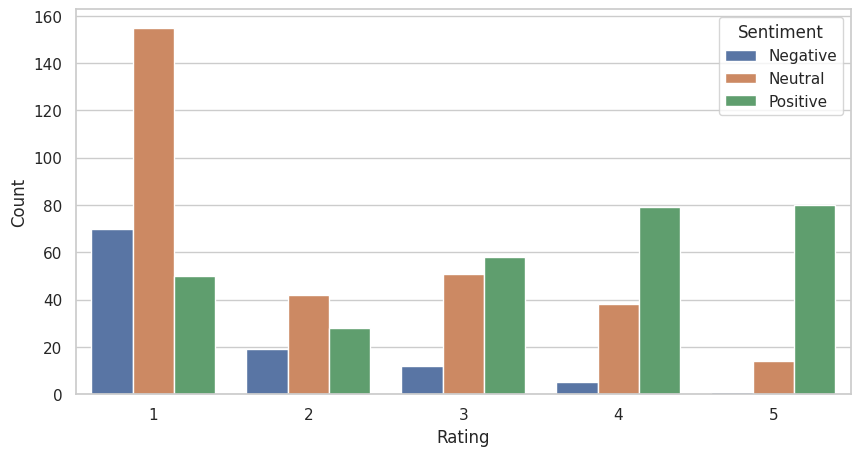

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,
              x='Rating',
              hue='sentiment')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

In [ ]:
#app review sentiment analysis is a valuable tool for app developers and business
#to understand user feedback ,proitize feature update and maintain a possitive user community.
#it involves using data analysis tachnique to determine wheather the sentiment in these riviews are positive
#nagative or netrual

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
tips=sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<Axes: xlabel='total_bill', ylabel='tip'>

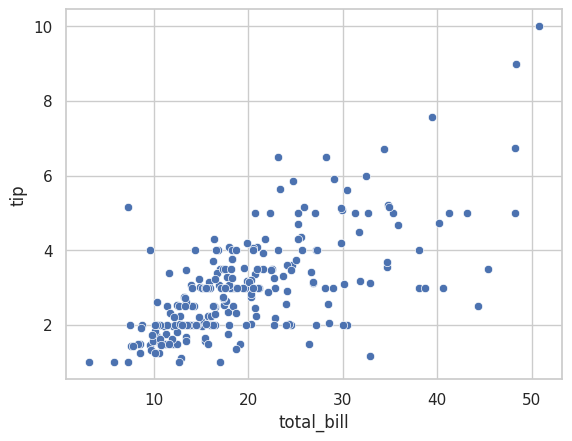

In [ ]:
#scatterplot (numerical column - numerical column)
sns.scatterplot(x=tips['total_bill'],  #df=
                y=tips['tip'])

<Axes: xlabel='total_bill', ylabel='tip'>

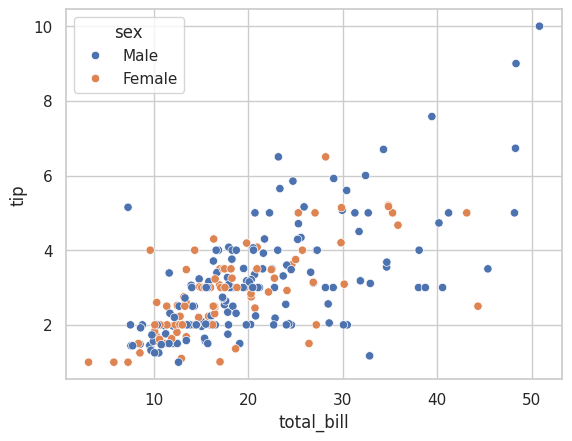

In [ ]:
sns.scatterplot(x="total_bill",y="tip",data=tips,hue=tips['sex'])

<Axes: xlabel='total_bill', ylabel='tip'>

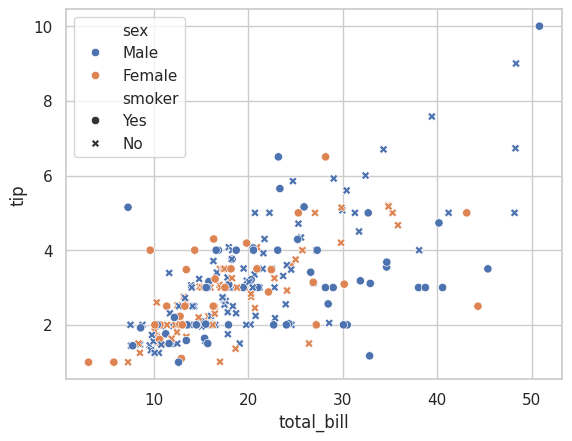

In [ ]:
sns.scatterplot(x="total_bill",
                y="tip",data=tips,
                hue=tips['sex'],style=tips['smoker'])

In [ ]:
p=pd.crosstab(tips['day'],tips['time'])  #heatmap(categorical - categorical)
p

time,Lunch,Dinner
day,,
Thur,61,1
Fri,7,12
Sat,0,87
Sun,0,76


<Axes: xlabel='time', ylabel='day'>

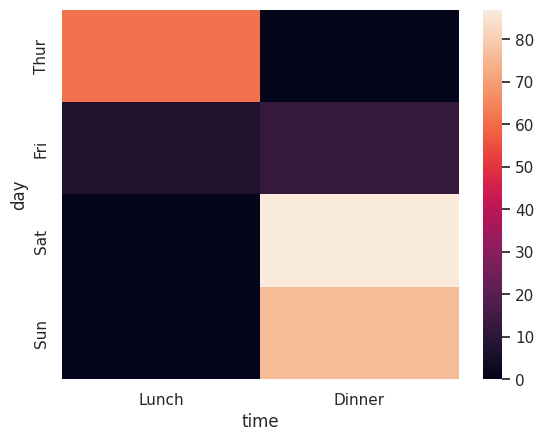

In [ ]:
sns.heatmap(p)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns